## 

# Heart disease prediction

In [164]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from ydata_profiling import ProfileReport
#Profile report takes very long to generate change the bool below to allow for report generation
togeneratereport = False
sb.set() # set the default Seaborn style for graphics


In [165]:
heartdata = pd.read_excel("Heart.xlsx")
heartdata.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Echocardiogram,Blood culture,EKG,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Heart Disease,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,220,150,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,None,None,Shows evidence of left ventricular hypertrophy,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Presence,"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,210,130,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,None,None,Shows evidence of left ventricular hypertrophy,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Absence,"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,230,140,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,None,None,Shows evidence of left ventricular hypertrophy,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Presence,"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,240,150,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,None,None,Shows evidence of left ventricular hypertrophy,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Absence,"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,220,140,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,None,None,Shows evidence of left ventricular hypertrophy,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Absence,"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [166]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 non-null    int64 
 9   Lung sounds                                

In [167]:
if togeneratereport:
    profile = ProfileReport(heartdata, title="Profiling Report Before Data Cleaning")
    profile.to_notebook_iframe()

### Data Cleaning 

In [168]:
#drop irrelevant columns - Name, Treatments 
heartdata = heartdata.drop(columns=['Name', 'Treatment'])

In [169]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 47 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Gender                                           334 non-null    object
 1   Age                                              334 non-null    int64 
 2   Chest pain                                       334 non-null    int64 
 3   Shortness of breath                              334 non-null    int64 
 4   Fatigue                                          334 non-null    int64 
 5   Systolic                                         334 non-null    int64 
 6   Diastolic                                        334 non-null    int64 
 7   Heart rate (bpm)                                 334 non-null    int64 
 8   Lung sounds                                      334 non-null    int64 
 9   Cholesterol level (mg/dL)                  

In [170]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
heartdata.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,50.149701,0.880240,0.826347,0.979042,133.098802,83.203593,101.152695,0.859281,213.637725,136.916168,50.134731,0.002994,0.005988,0.029940,0.026946,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.029940,0.041916,0.203593,0.173653,0.137725,0.002994,0.553892,0.086826,0.122754,0.350299,0.586826,0.056886,0.458084
std,15.151935,0.325168,0.379379,0.143459,10.040121,6.947282,11.667466,0.348253,26.169645,24.484085,14.526453,0.054718,0.077266,0.170678,0.162169,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.170678,0.200698,0.403274,0.379379,0.345128,0.054718,0.497833,0.282003,0.328648,0.477779,0.493142,0.231973,0.498987
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,96.250000,1.000000,200.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.500000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,230.000000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,310.000000,240.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
#Remove Outliers for Age

def remove_outliers(df, df_col): 
    q1 = np.percentile(df_col, 25)
    q3 = np.percentile(df_col, 75)
    iqr = q3-q1
    low_bound = q1-(1.5*iqr)
    upp_bound = q3+(1.5*iqr)
    df=df[(df_col>=low_bound)&(df_col<=upp_bound)]
    return df

In [172]:
heartdata = remove_outliers(heartdata, heartdata["Age"])
heartdata.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,49.864458,0.879518,0.825301,0.978916,132.996988,83.162651,101.159639,0.858434,213.087349,136.325301,50.346386,0.003012,0.006024,0.030120,0.027108,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.042169,0.204819,0.174699,0.138554,0.003012,0.551205,0.087349,0.123494,0.346386,0.584337,0.057229,0.454819
std,14.741161,0.326016,0.380282,0.143882,9.983823,6.948063,11.702317,0.349131,25.260603,23.333706,14.305173,0.054882,0.077498,0.171177,0.162645,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.201277,0.404179,0.380282,0.346002,0.054882,0.498122,0.282773,0.329500,0.476536,0.493580,0.232630,0.498706
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,95.000000,1.000000,198.750000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,60.000000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,226.250000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,290.000000,220.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [173]:
#Change "Heart Disease" column from string to numerical categorical data 
heartdata["Heart Disease"] = heartdata["Heart Disease"].map({"Absence":0, "Presence":1})
heartdata["Heart Disease"].value_counts()

0    189
1    143
Name: Heart Disease, dtype: int64

In [174]:
heartdata["Blood culture"].value_counts()

None                                       274
Positive for Staphylococcus aureus          16
Positive for Streptococcus viridans         10
Positive for Streptococcus bovis             5
Positive for Streptococcus pneumoniae        4
Positive for Candida albicans                3
Positive for Streptococcus pneumonia         2
Positive for Staphylococcus epidermidis      2
Positive for Streptococcus mitis             2
Positive for Candida tropicalis              2
Positive for Streptococcus sanguinis         1
Positive for Enterococcus faecalis           1
Positive for Streptococcus salivarius        1
Positive for Candida glabrata                1
Positive for Streptococcus anginosus         1
Positive for Candida krusei                  1
Positive for Candida parapsilosis            1
Positive for Candida dubliniensis            1
Positive for Candida lusitaniae              1
Positive for Candida guilliermondii          1
Positive for Candida rugosa                  1
Positive for 

In [175]:
"""
Sort strings into categorical data, categorize by type of bacteria: None(0), Staphylococcus(1), Streptococcus(2), 
Candida(3), Other(4)
"""
def blood_culture(data): 
    if data=='None': 
        return 0
    elif 'Staphylococcus' in data: 
        return 1
    elif 'Streptococcus' in data: 
        return 2 
    elif 'Candida' in data: 
        return 3
    else: 
        return 4 
heartdata["Blood culture"]=heartdata["Blood culture"].map(blood_culture)
heartdata["Blood culture"].value_counts()

0    274
2     27
1     18
3     12
4      1
Name: Blood culture, dtype: int64

In [176]:
heartdata["Echocardiogram"].value_counts() #this data is partially represented in other columns - drop? 

None                                                                                             216
Shows increased pressure in the right ventricle                                                   44
Shows vegetation on the mitral valve                                                              23
Shows vegetation on the aortic valve                                                              11
Shows vegetation on the tricuspid valve                                                            7
Shows increased pressure in the right ventricle and decreased function of the right ventricle      7
Shows increased pressure in the right ventricle and decreased function of the left ventricle       6
Shows vegetation on the mitral valve and tricuspid valve                                           4
Shows vegetation on the pulmonary valve                                                            3
Shows vegetation on the mitral valve and aortic valve                                      

In [177]:
heartdata["EKG"].value_counts() #too many variations - drop col?

None                                                                               57
Shows evidence of endocarditis                                                     43
Shows evidence of left ventricular hypertrophy                                     33
Shows evidence of pericarditis                                                     32
Shows evidence of restrictive cardiomyopathy                                       10
Shows evidence of dilated cardiomyopathy                                           10
Normal                                                                             10
Shows evidence of Takotsubo cardiomyopathy                                         10
Shows evidence of arrhythmogenic right ventricular cardiomyopathy                  10
Shows evidence of hypertrophic cardiomyopathy                                      10
Shows evidence of pulmonary stenosis                                               10
Shows evidence of tricuspid stenosis                  

In [178]:
heartdata["Cardiac CT"].value_counts()

None                                                                    117
Shows thickening of the pericardium                                      14
Shows pericarditis with myocarditis                                      12
Shows pericardial effusion and tamponade                                 11
Shows constrictive pericarditis                                           9
Shows a moderate stenosis in the pulmonary valve                          8
Shows effusion in the pericardium                                         8
Shows a moderate stenosis in the tricuspid valve                          7
Shows a moderate stenosis in the aortic valve                             5
Shows a severe stenosis in the aortic valve                               5
Shows a moderate stenosis in the mitral valve                             5
Shows a moderate restriction in the ventricular filling                   5
Shows a severe dysfunction of the right ventricle                         5
Shows a seve

In [179]:
heartdata["Chest x-ray"].value_counts() #too many empty, drop col or assume normal lung structure? 

None                                                                                                      275
Shows increased vascular markings in the lungs                                                             23
Shows normal lung structures with no obvious abnormalities                                                 10
Shows hyperinflation, bronchial wall thickening, and increased vascular markings                            8
Shows increased vascular markings, small areas of fibrosis, and signs of lung restriction                   4
Shows increased vascular markings, small areas of fibrosis and signs of lung restriction                    3
Shows hyperinflation and bronchial wall thickening                                                          2
Shows increased vascular markings and signs of lung restriction                                             2
Shows increased vascular markings and small areas of fibrosis in the lungs                                  1
Shows incr

In [180]:
heartdata["Previous illnesses"].value_counts() #change to 1s and 0s 

None                                   315
Recent chest surgery                     4
Mitral valve replacement surgery         4
Aortic valve replacement surgery         4
Recent viral infection                   3
Tricuspid valve replacement surgery      2
Name: Previous illnesses, dtype: int64

In [181]:
def previous_illnesses(data): 
    if data=='None': 
        return 0
    else:
        return 1
heartdata["Previous illnesses"]=heartdata["Previous illnesses"].map(previous_illnesses)
heartdata["Previous illnesses"].value_counts()

0    315
1     17
Name: Previous illnesses, dtype: int64

In [182]:
heartdata["Pulmonary function tests"].value_counts() #too many empty, drop col

None                                                                                                                    285
Shows decreased lung capacity                                                                                            23
Shows normal lung capacity                                                                                               10
Shows decreased lung capacity and reduced diffusing capacity of the lung for carbon monoxide                              9
Shows decreased lung capacity, reduced diffusing capacity of the lung for carbon monoxide and decreased lung volumes      5
Name: Pulmonary function tests, dtype: int64

In [183]:
heartdata["Spirometry"].value_counts() #too many empty, drop col

None                                                             322
Shows decreased lung function and increased airway resistance     10
Name: Spirometry, dtype: int64

In [184]:
heartdata.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Blood culture,Obesity,Murmur,Previous illnesses,Heart Disease
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,49.864458,0.879518,0.825301,0.978916,132.996988,83.162651,101.159639,0.858434,213.087349,136.325301,50.346386,0.003012,0.006024,0.030120,0.027108,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.042169,0.204819,0.174699,0.138554,0.003012,0.551205,0.087349,0.123494,0.346386,0.584337,0.337349,0.057229,0.454819,0.051205,0.430723
std,14.741161,0.326016,0.380282,0.143882,9.983823,6.948063,11.702317,0.349131,25.260603,23.333706,14.305173,0.054882,0.077498,0.171177,0.162645,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.201277,0.404179,0.380282,0.346002,0.054882,0.498122,0.282773,0.329500,0.476536,0.493580,0.800711,0.232630,0.498706,0.220748,0.495925
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,95.000000,1.000000,198.750000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,226.250000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,290.000000,220.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
def stenosis(data): 
    if data["Mitral stenosis"]==1: 
        return 1
    elif data["Aortic stenosis"]==1: 
        return 1 
    elif data["Tricuspid stenosis"]==1:
        return 1 
    elif data["Pulmonary stenosis"]==1: 
        return 1
    else: 
        return 0
heartdata["Stenosis"]=heartdata.apply(lambda data:stenosis(data), axis=1)

In [186]:
def cardiomyopathy(data): 
    if data["Dilated cardiomyopathy"]==1: 
        return 1
    elif data["Hypertrophic cardiomyopathy"]==1: 
        return 1 
    elif data["Restrictive cardiomyopathy"]==1:
        return 1 
    elif data["Arrhythmogenic right ventricular cardiomyopathy"]==1: 
        return 1
    elif data["Takotsubo cardiomyopathy"]==1: 
        return 1
    else: 
        return 0
heartdata["Cardiomyopathy"]=heartdata.apply(lambda data:cardiomyopathy(data), axis=1)

In [187]:
heartdata.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Blood culture,Obesity,Murmur,Previous illnesses,Heart Disease,Stenosis,Cardiomyopathy
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,49.864458,0.879518,0.825301,0.978916,132.996988,83.162651,101.159639,0.858434,213.087349,136.325301,50.346386,0.003012,0.006024,0.030120,0.027108,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.030120,0.042169,0.204819,0.174699,0.138554,0.003012,0.551205,0.087349,0.123494,0.346386,0.584337,0.337349,0.057229,0.454819,0.051205,0.430723,0.120482,0.150602
std,14.741161,0.326016,0.380282,0.143882,9.983823,6.948063,11.702317,0.349131,25.260603,23.333706,14.305173,0.054882,0.077498,0.171177,0.162645,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.171177,0.201277,0.404179,0.380282,0.346002,0.054882,0.498122,0.282773,0.329500,0.476536,0.493580,0.800711,0.232630,0.498706,0.220748,0.495925,0.326016,0.358201
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,95.000000,1.000000,198.750000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,226.250000,150.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,290.000000,220.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [188]:
heartdata['Gender'].replace("Female", 0, inplace=True)
heartdata['Gender'].replace("Male", 1, inplace=True)

### EDA

In [189]:
if togeneratereport:
    profile = ProfileReport(heartdata, title="Profiling Report")
    profile.to_notebook_iframe()

In [190]:
dataNum = heartdata.select_dtypes(include = np.int64)

<AxesSubplot: ylabel='Count'>

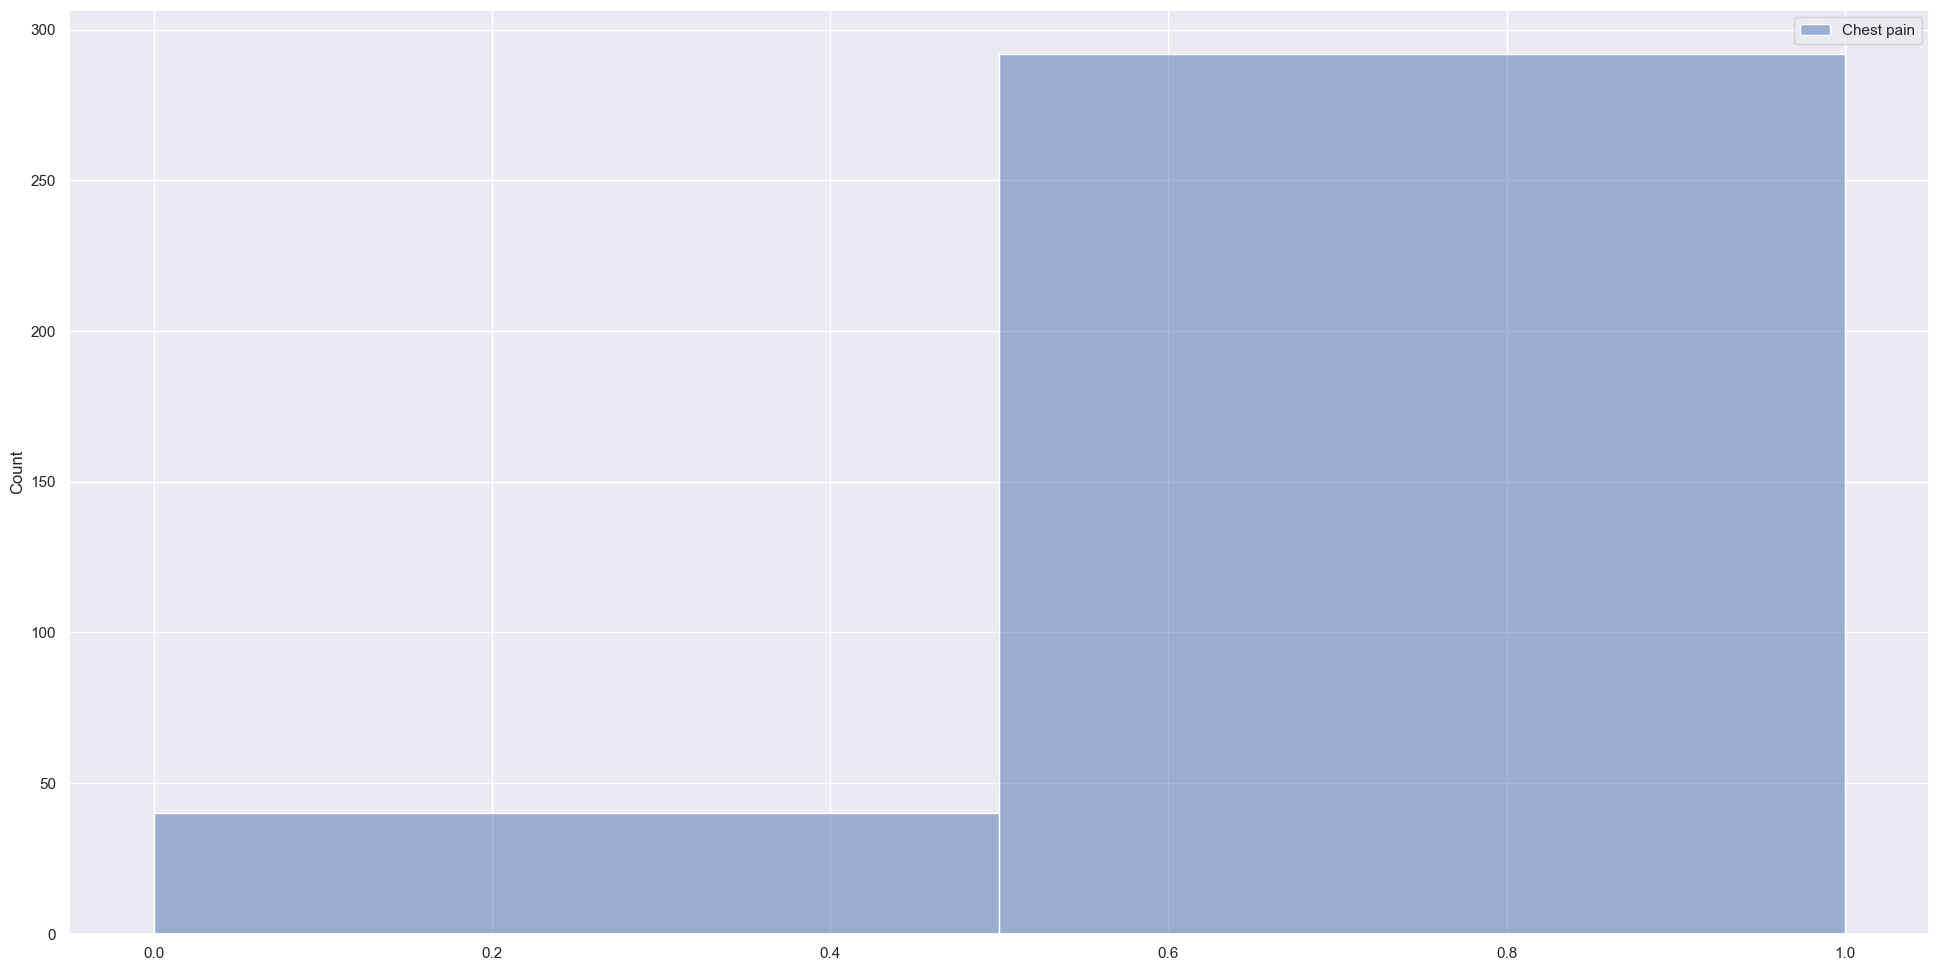

In [191]:
chestpain = pd.DataFrame(dataNum['Chest pain'])
f = plt.figure(figsize=(24, 12))
sb.histplot(data=chestpain, bins=2)

C:\Users\chien\AppData\Local\Temp\ipykernel_64608\33091072.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heartdata[binary_vars + ['Heart Disease']].corr()


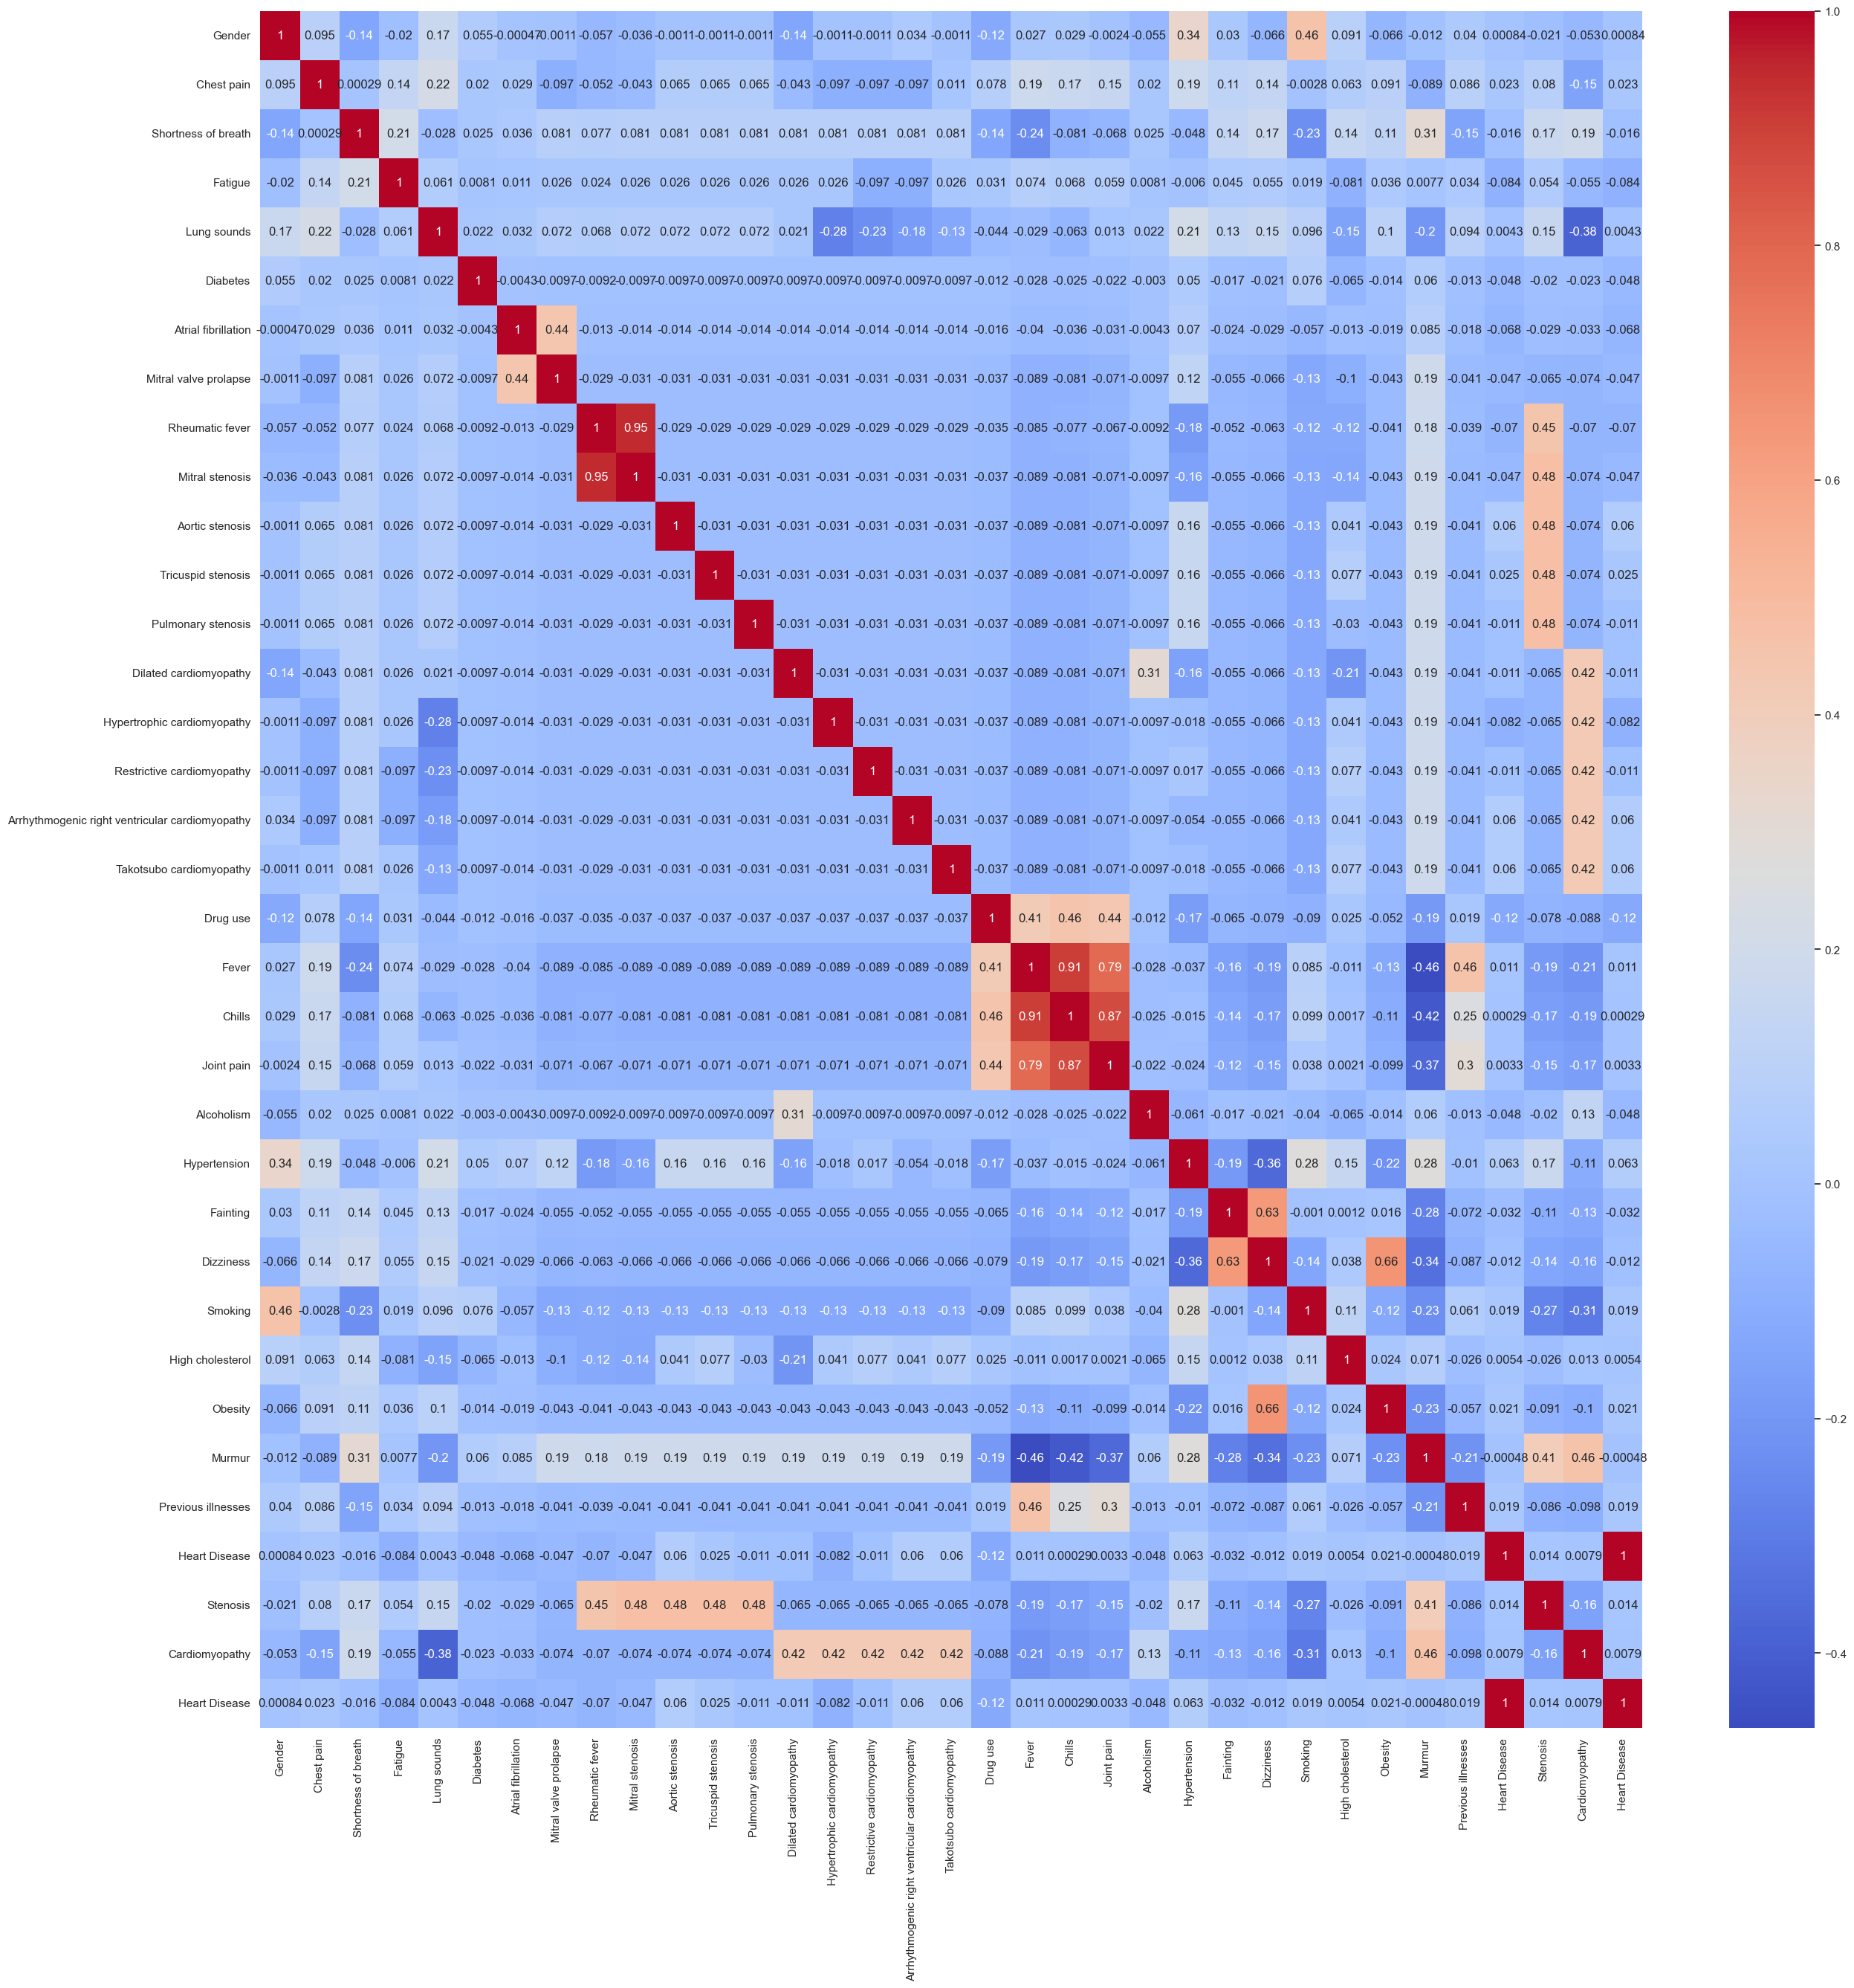

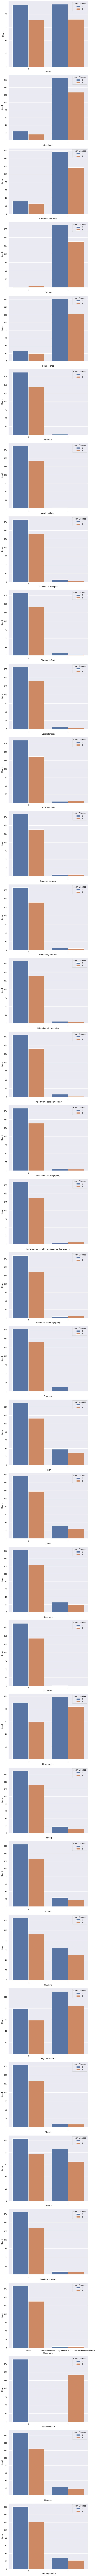

In [192]:
binary_vars = []
for col in heartdata.columns:
    if heartdata[col].nunique() == 2:
        binary_vars.append(col)
corr_matrix = heartdata[binary_vars + ['Heart Disease']].corr()
f, ax = plt.subplots(figsize=(30, 30))
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True,ax=ax)

# Create subplots for each binary variable
fig, axes = plt.subplots(nrows=len(binary_vars), figsize=(8, 6*len(binary_vars)))
for i, var in enumerate(binary_vars):
    sb.countplot(x=var, hue='Heart Disease', data=heartdata, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Heart Disease', loc='upper right')

plt.tight_layout()
plt.show()

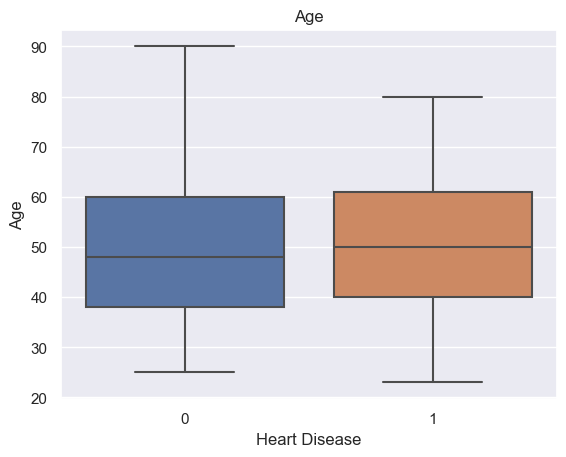

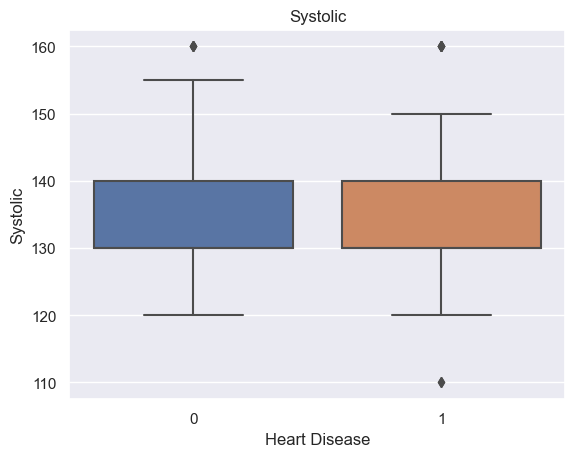

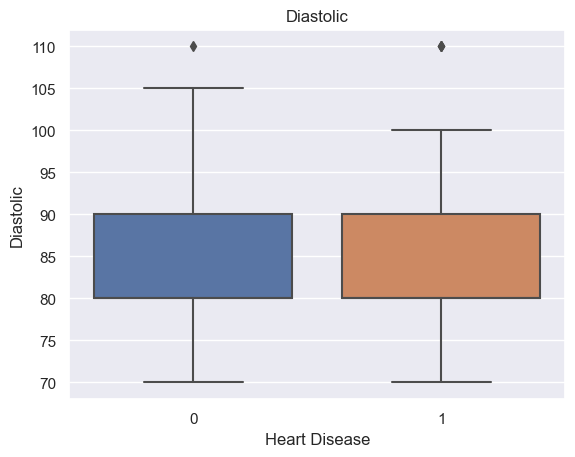

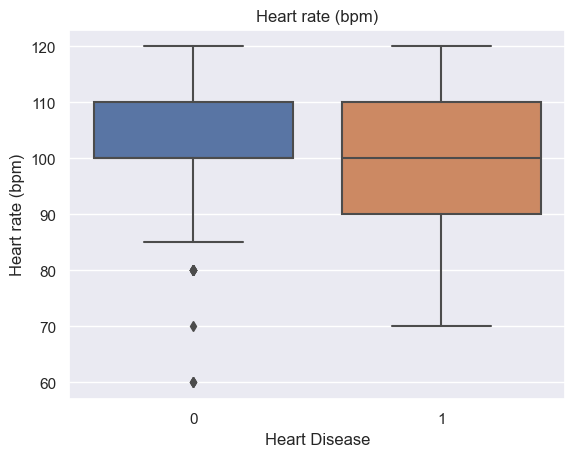

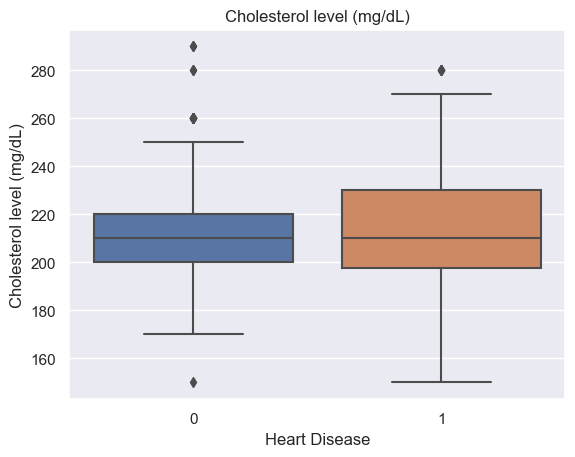

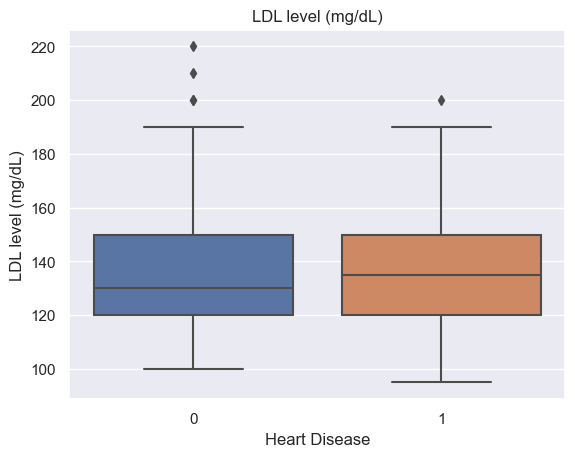

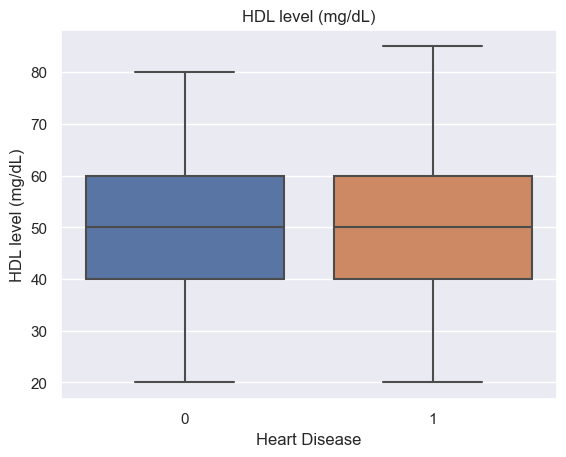

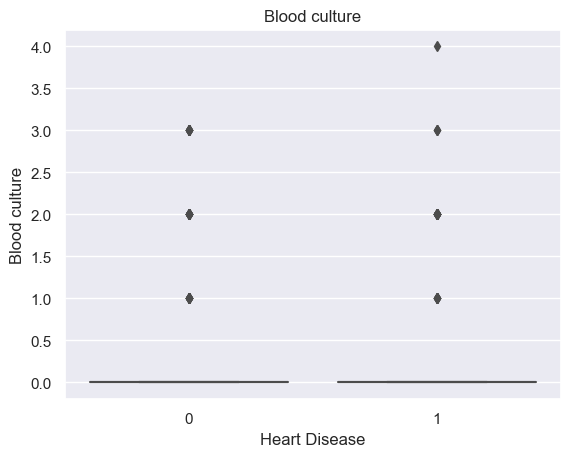

In [193]:
numeric_cols = []
for col in heartdata.columns:
    if heartdata[col].nunique() > 2:
        if heartdata[col].dtype == 'int64':
            numeric_cols.append(col)

# Generate boxplot for each numeric column by presence/absence of heart disease
for col in numeric_cols:
    plt.figure()
    sb.boxplot(x='Heart Disease', y=col, data=heartdata)
    plt.title(col)
    plt.show()

C:\Users\chien\AppData\Local\Temp\ipykernel_64608\1729033432.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data2.corr()


<AxesSubplot: >

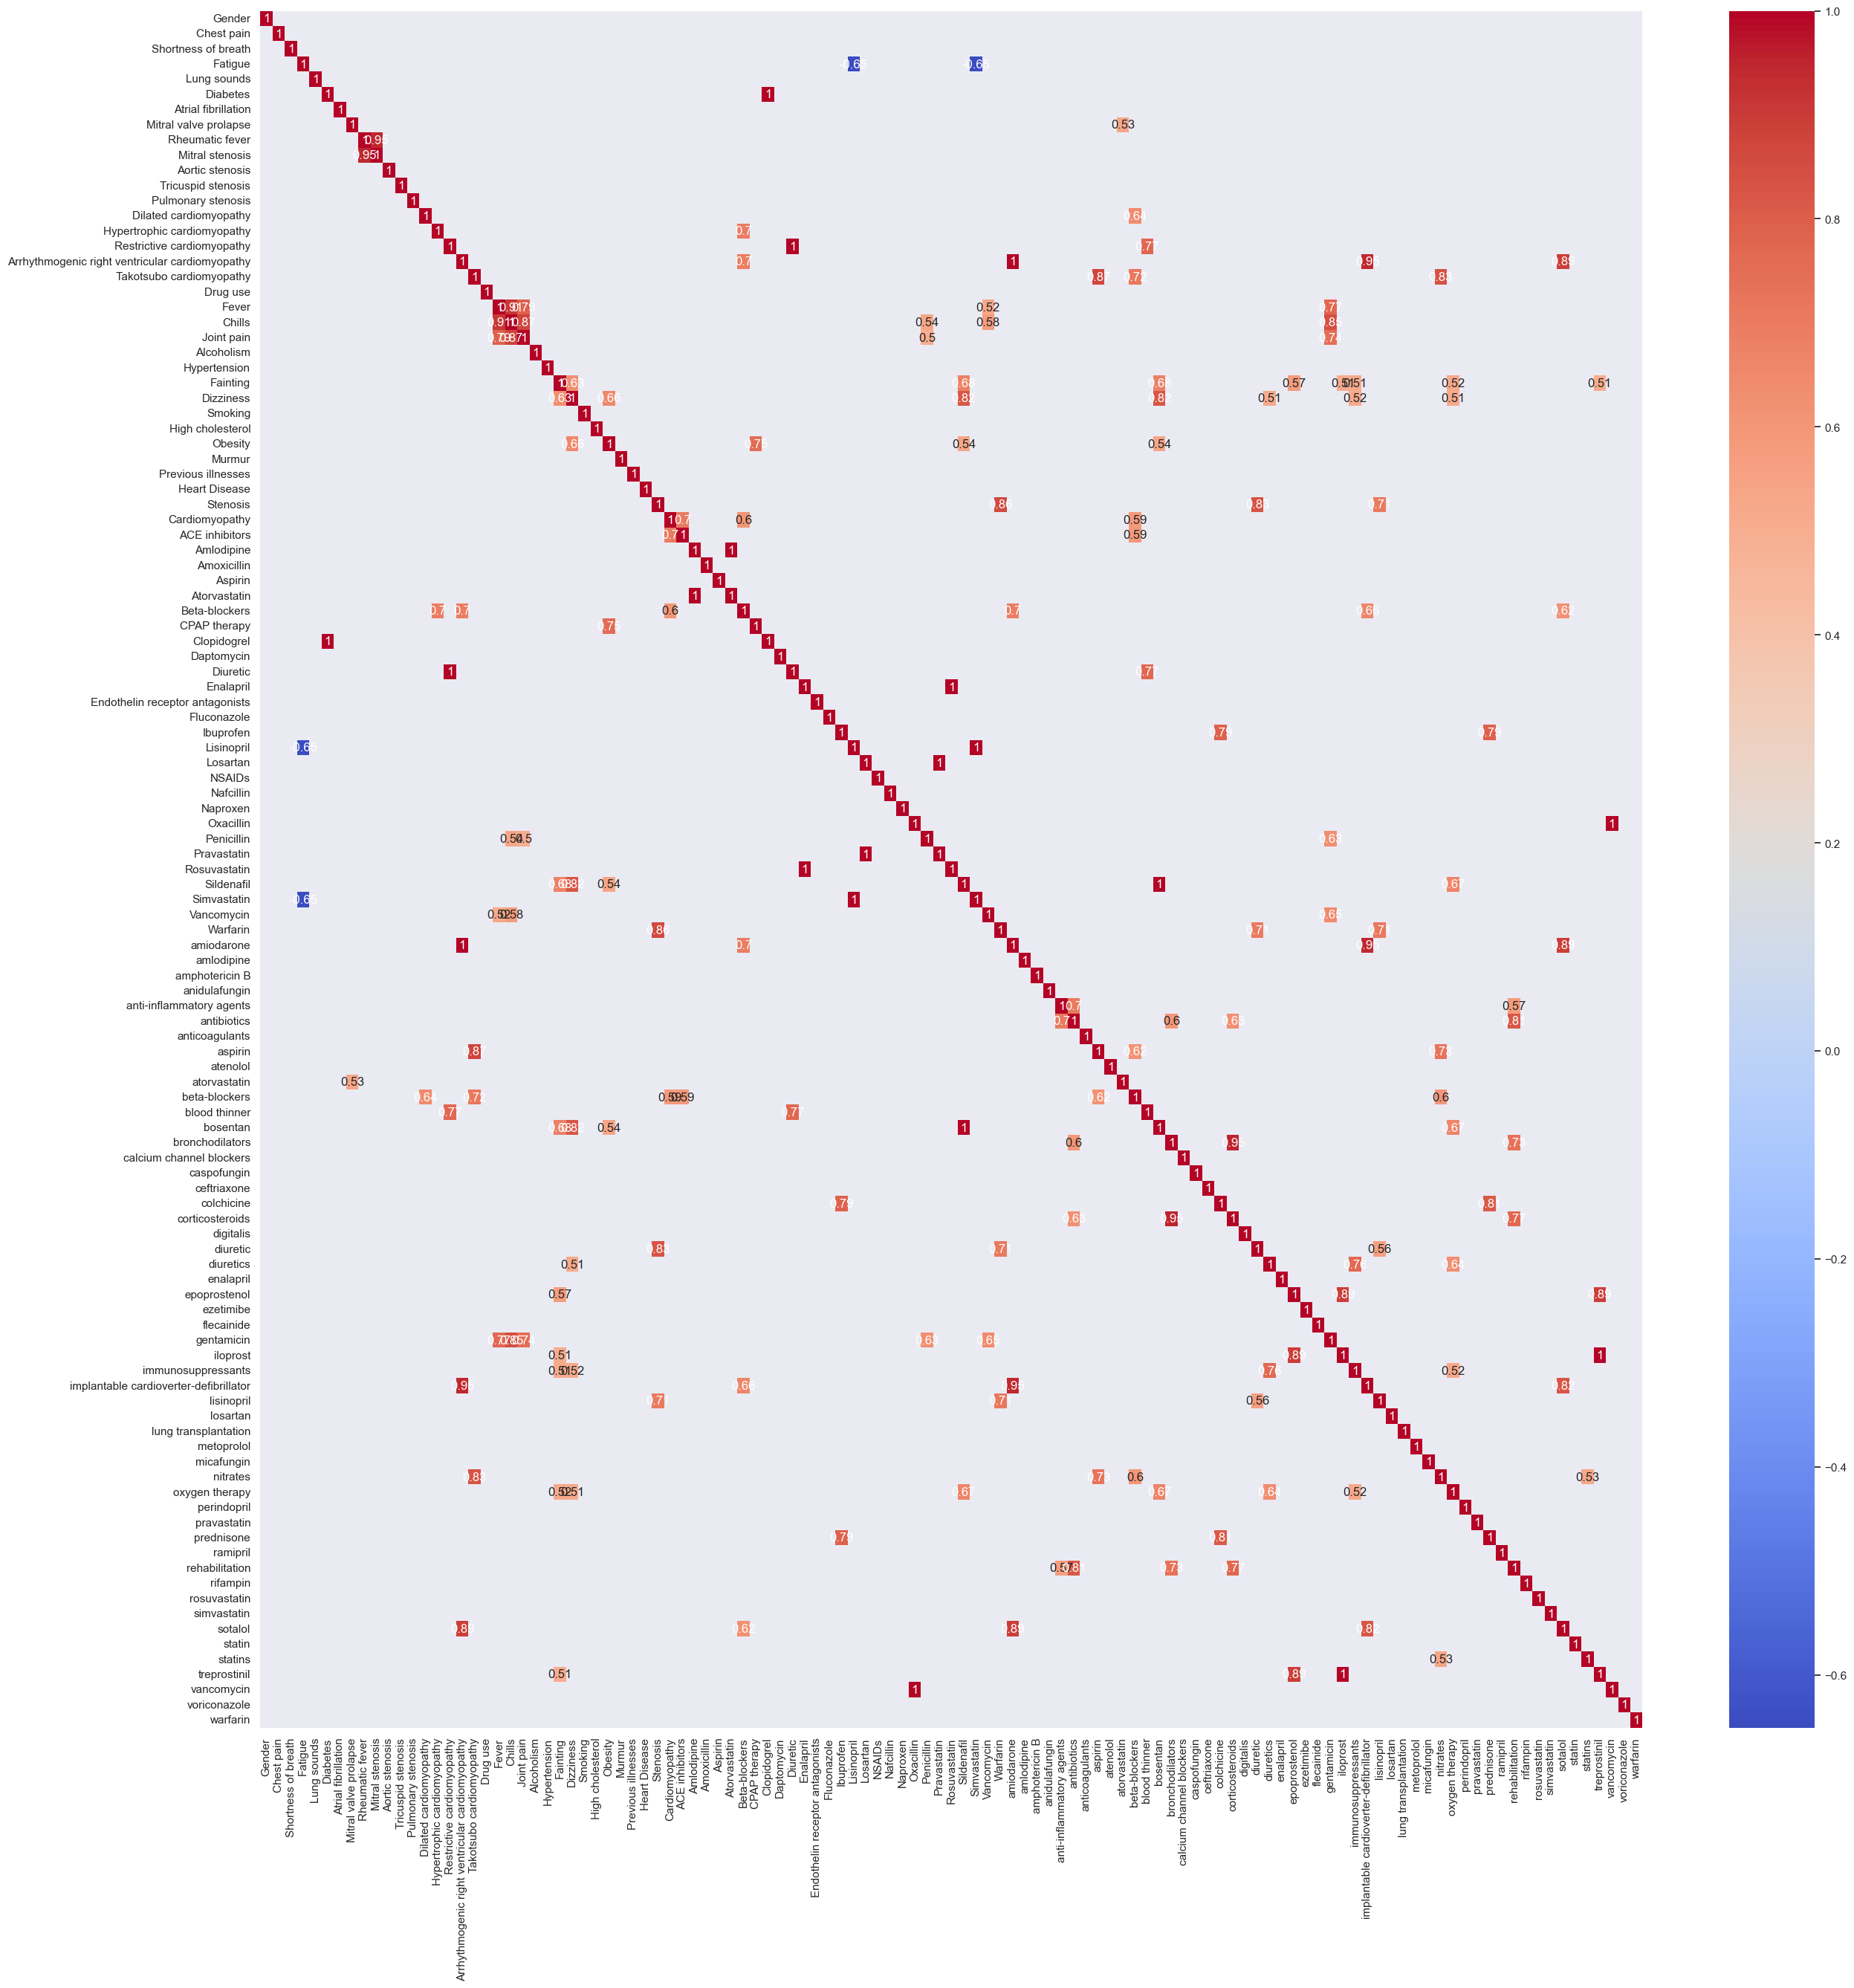

In [194]:
medications = heartdata['Medications'].str.get_dummies(sep=', ')


data2 = pd.concat([heartdata[binary_vars], medications], axis=1)
corr_matrix = data2.corr()
mask = corr_matrix.abs() > 0.5

# Plot heatmap with masked values
f, ax = plt.subplots(figsize=(30, 30))
sb.heatmap(corr_matrix[mask], cmap='coolwarm', annot=True, ax=ax)

In [195]:
corr_indices = np.where(np.abs(corr_matrix) > 0.5)

# Iterate over the indices and print out the correlations and the corresponding variable pairs
for i, j in zip(*corr_indices):
    if i != j and 0.5<corr_matrix.iloc[i, j]<1:
        print(f"Correlation of {corr_matrix.iloc[i, j]:.2f} between {corr_matrix.columns[i]} and {corr_matrix.columns[j]}")

Correlation of 0.53 between Mitral valve prolapse and atorvastatin
Correlation of 0.95 between Rheumatic fever and Mitral stenosis
Correlation of 0.95 between Mitral stenosis and Rheumatic fever
Correlation of 0.64 between Dilated cardiomyopathy and beta-blockers
Correlation of 0.70 between Hypertrophic cardiomyopathy and Beta-blockers
Correlation of 0.77 between Restrictive cardiomyopathy and blood thinner
Correlation of 0.70 between Arrhythmogenic right ventricular cardiomyopathy and Beta-blockers
Correlation of 0.95 between Arrhythmogenic right ventricular cardiomyopathy and implantable cardioverter-defibrillator
Correlation of 0.89 between Arrhythmogenic right ventricular cardiomyopathy and sotalol
Correlation of 0.87 between Takotsubo cardiomyopathy and aspirin
Correlation of 0.72 between Takotsubo cardiomyopathy and beta-blockers
Correlation of 0.83 between Takotsubo cardiomyopathy and nitrates
Correlation of 0.91 between Fever and Chills
Correlation of 0.79 between Fever and Joi

## KNN

In [196]:
heartdata = heartdata.drop(columns=['EKG', 'Cardiac CT', 'Chest x-ray','Pulmonary function tests','Spirometry','Medications','Echocardiogram'])
#heartdata.drop("")

In [197]:
heartdata.head()

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),HDL level (mg/dL),Diabetes,Atrial fibrillation,Mitral valve prolapse,Rheumatic fever,Mitral stenosis,Aortic stenosis,Tricuspid stenosis,Pulmonary stenosis,Dilated cardiomyopathy,Hypertrophic cardiomyopathy,Restrictive cardiomyopathy,Arrhythmogenic right ventricular cardiomyopathy,Takotsubo cardiomyopathy,Drug use,Fever,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Blood culture,Obesity,Murmur,Previous illnesses,Heart Disease,Stenosis,Cardiomyopathy
0,0,55,1,1,1,140,90,100,1,220,150,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0
1,1,57,1,1,1,150,80,110,1,210,130,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
2,0,60,1,1,1,130,85,95,1,230,140,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0
3,1,62,1,1,1,145,90,100,1,240,150,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0
4,0,58,1,1,1,135,80,105,1,220,140,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0


In [198]:
y = heartdata['Heart Disease']
x_data = heartdata.drop(['Heart Disease'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)

In [199]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 55.22%


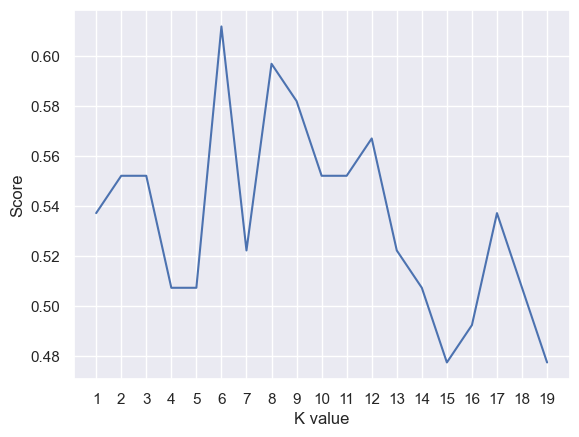

Maximum KNN Score is 61.19%


In [200]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

<AxesSubplot: >

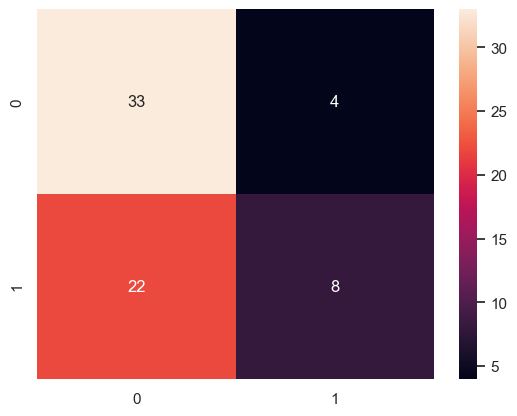

In [201]:
knn2 = KNeighborsClassifier(n_neighbors = 6)
knn2.fit(x_train, y_train)
pred = knn2.predict(x_test)
knn_cm = confusion_matrix(y_test,pred)
sb.heatmap(knn_cm,annot=True)

## SVM

In [202]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 55.22%


<AxesSubplot: >

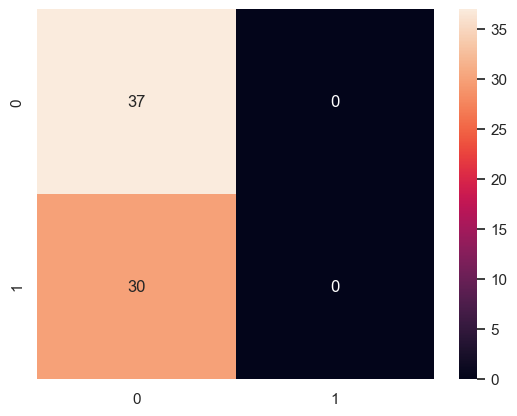

In [203]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
pred = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,pred)
sb.heatmap(svm_cm,annot=True)